In [2]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CCO')
print(mol)

In [3]:
print(Chem.MolToSmiles(mol))

CCO


In [5]:
from rdkit.Chem import Descriptors

mol_weight = Descriptors.MolWt(mol)
print(f'Molecular Weight: {mol_weight}')

Molecular Weight: 46.069


In [6]:
logp = Descriptors.MolLogP(mol)
print(f'LogP: {logp}')

LogP: -0.0014000000000000123


In [8]:
h_donors = Descriptors.NumHDonors(mol)
h_acceptors = Descriptors.NumHAcceptors(mol)

print(f'Hydrogen Bond Donors: {h_donors}')
print(f'Hydrogen Bond Acceptors: {h_acceptors}')

Hydrogen Bond Donors: 1
Hydrogen Bond Acceptors: 1


## Visualizing Molecules

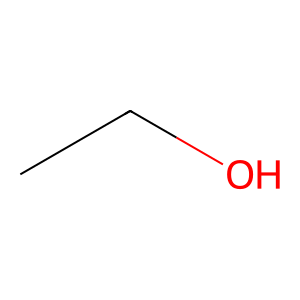

In [12]:
from rdkit.Chem import Draw

Draw.MolToImage(mol)

In [13]:
Draw.MolToFile(mol, "ethanol.png")

In [15]:
from rdkit.Chem import SDMolSupplier

supplier = SDMolSupplier("Discovery_Chemicals.sdf")
mols = [mol for mol in supplier if mol is not None]

print(len(mols))

[18:53:57] skipping block at line 39097: 'BEGIN ATOM'
[18:53:57] skipping block at line 39099: 'BEGIN BOND'
[18:53:57] skipping block at line 39933: 'BEGIN ATOM'
[18:53:57] skipping block at line 39935: 'BEGIN BOND'
[18:53:58] skipping block at line 131132: 'BEGIN ATOM'
[18:53:58] skipping block at line 131134: 'BEGIN BOND'
[18:53:58] skipping block at line 131166: 'BEGIN ATOM'
[18:53:58] skipping block at line 131168: 'BEGIN BOND'
[18:53:58] skipping block at line 131200: 'BEGIN ATOM'
[18:53:58] skipping block at line 131202: 'BEGIN BOND'
[18:53:58] skipping block at line 163415: 'BEGIN ATOM'
[18:53:58] skipping block at line 163417: 'BEGIN BOND'
[18:53:58] skipping block at line 185993: 'BEGIN ATOM'
[18:53:58] skipping block at line 185995: 'BEGIN BOND'
[18:53:58] skipping block at line 193374: 'BEGIN ATOM'
[18:53:58] skipping block at line 193376: 'BEGIN BOND'
[18:53:59] skipping block at line 319919: 'BEGIN ATOM'
[18:53:59] skipping block at line 319921: 'BEGIN BOND'
[18:53:59] ski

5946


[18:53:59] skipping block at line 352473: 'BEGIN ATOM'
[18:53:59] skipping block at line 352475: 'BEGIN BOND'


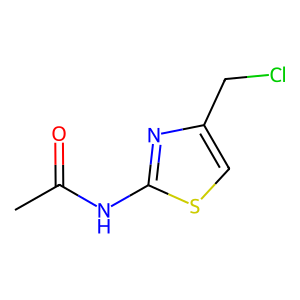

In [21]:
Draw.MolToImage(mols[4])

In [22]:
import pandas as pd

data = []
for mol in mols:
    smiles = Chem.MolToSmiles(mol)
    mol_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)

    data.append([smiles, mol_weight, logp])

df = pd.DataFrame(data, columns = ["SMILES",
                                   "Molecular Weight",
                                   "LogP"])
df.to_csv("molecular_data.csv", index = False)

In [26]:
# Molecule Analyzer
from rdkit.Chem import Descriptors
def mol_analysis(mol):
    '''
    str (SMILES) -> molecular weight, 
                    LogP
                    H bond donors
                    H bond acceptors
    '''
    rdmol = Chem.MolFromSmiles(mol)
    if mol:
        return {"mol_weight": Descriptors.MolWt(rdmol),
                "LogP": Descriptors.MolLogP(rdmol),
                "h_donors": Descriptors.NumHDonors(rdmol),
                "h_acceptors": Descriptors.NumHAcceptors(rdmol)
        }
    else:
        return "Invalid SMILES"

In [28]:
print(mol_analysis("CCO"))  # Ethanol
print(mol_analysis("CCCC"))  # Butane
print(mol_analysis("C1=CC=CC=C1"))  # Benzene

{'mol_weight': 46.069, 'LogP': -0.0014000000000000123, 'h_donors': 1, 'h_acceptors': 1}
{'mol_weight': 58.123999999999995, 'LogP': 1.8064, 'h_donors': 0, 'h_acceptors': 0}
{'mol_weight': 78.11399999999999, 'LogP': 1.6866, 'h_donors': 0, 'h_acceptors': 0}
